**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORT DATA**

In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


**DATA PRE PROCESSING**

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df['Exited'].value_counts()

0    7964
1    2038
Name: Exited, dtype: int64

In [7]:
df.size

140028

In [8]:
df.shape

(10002, 14)

In [9]:
#ckecking duplicate records
duplicates=df.duplicated()
df[duplicates]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [10]:
#drop duplicates
df=df.drop_duplicates()

In [11]:
#checking null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

**DATA VISUALIZATION**

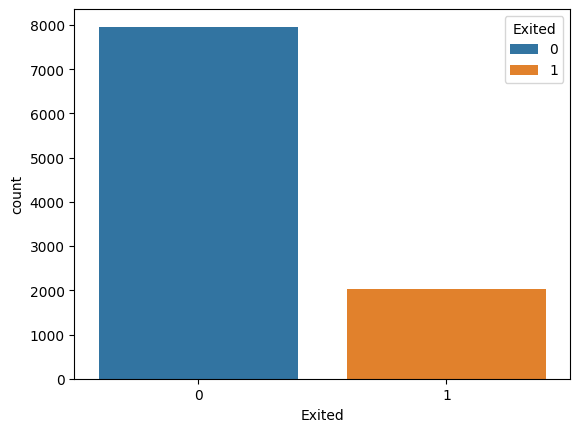

In [12]:
count=sns.countplot(x='Exited',data=df,hue='Exited')

<Axes: xlabel='Exited', ylabel='count'>

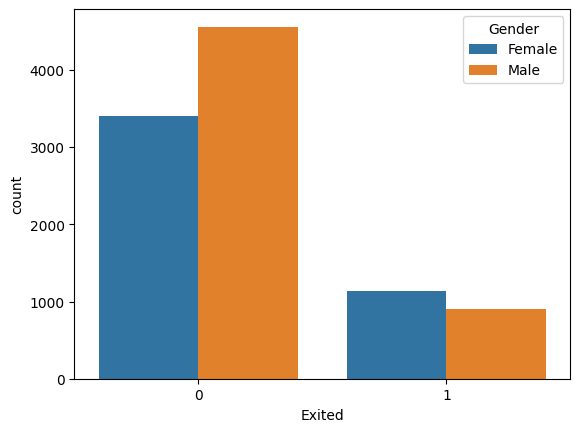

In [13]:
sns.countplot(x='Exited',data=df,hue='Gender')

<Axes: xlabel='Exited', ylabel='count'>

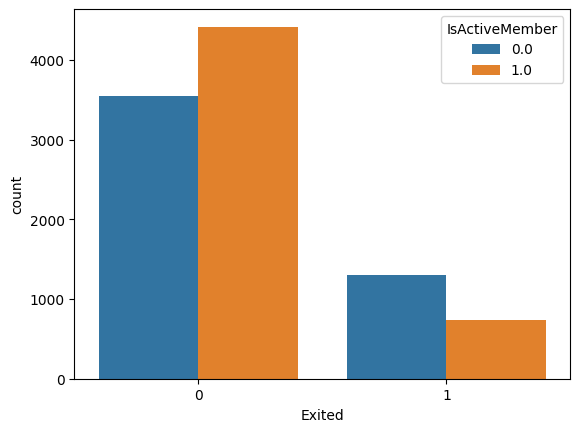

In [14]:
sns.countplot(x='Exited',data=df,hue='IsActiveMember')

<Axes: xlabel='Exited', ylabel='count'>

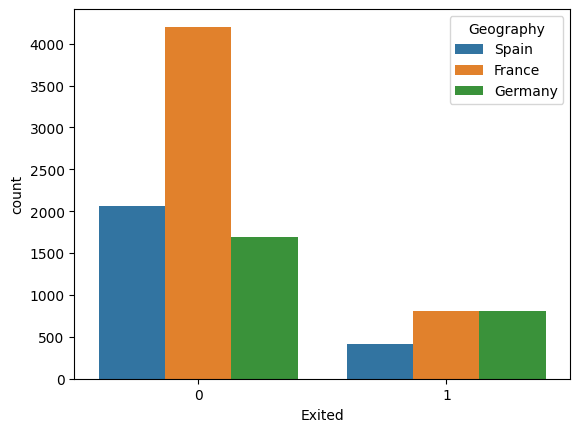

In [15]:
sns.countplot(x='Exited',data=df,hue='Geography')

([<matplotlib.patches.Wedge at 0x7b4d235dd660>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'not exited'),
  Text(0.8823431426537006, -0.6568642010431012, 'exited')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

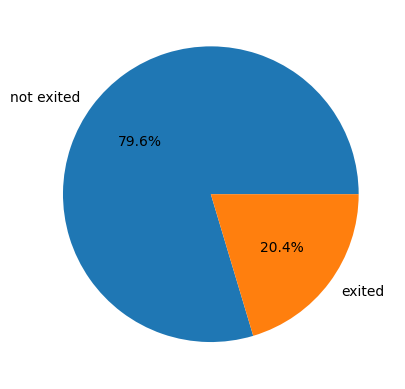

In [16]:
my_label=['not exited','exited']
plt.pie(df['Exited'].value_counts(),labels=my_label, autopct='%1.1f%%')

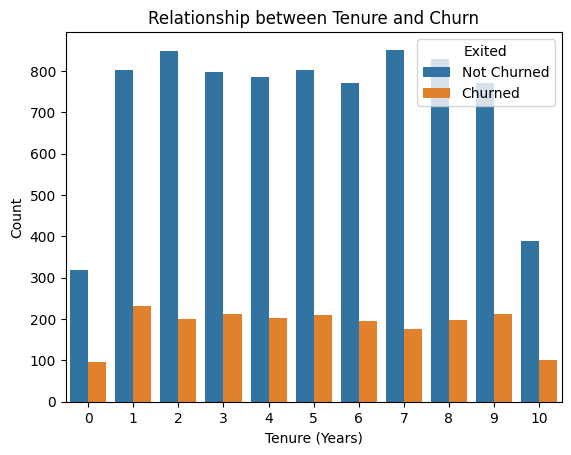

In [17]:
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title('Relationship between Tenure and Churn')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])

([<matplotlib.patches.Wedge at 0x7b4d20e91210>,
 [Text(-1.0850153755936578, 0.180946496858474, ''),
  Text(1.0850153607698996, -0.1809465857466362, '')],
 [Text(-0.5918265685056315, 0.09869808919553126, '94.7%'),
  Text(0.5918265604199452, -0.09869813767998337, '5.3%')])

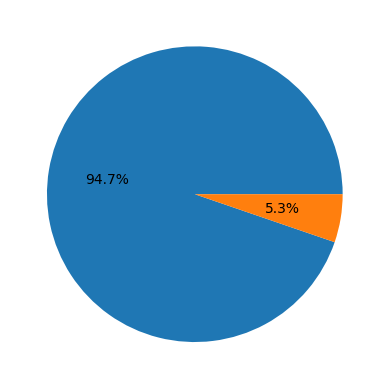

In [76]:
my_label=['not senior citizen','senior citizen']
plt.pie((df['Age']>=60).value_counts(),autopct='%1.1f%%')

In [86]:
df['Age Group'] = df['Age'].apply(lambda x: 'Age >= 60' if x >= 60 else 'Age < 60')
df

<ipython-input-86-67b36e2f248d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = df['Age'].apply(lambda x: 'Age >= 60' if x >= 60 else 'Age < 60')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,9474,526,Age Group
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1,9474,526,Age < 60
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0,9474,526,Age < 60
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1,9474,526,Age < 60
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0,9474,526,Age < 60
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0,9474,526,Age < 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0,9474,526,Age < 60
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0,9474,526,Age < 60
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1,9474,526,Age < 60
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1,9474,526,Age < 60


In [89]:
import plotly.express as px
fig = px.histogram(df, x="Exited",
                   color="Age Group",
                   barmode="group",
                   )
fig

In [18]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

**ENCODING**

In [19]:
dummy=pd.get_dummies(df[["Geography","Gender"]],drop_first=True)
dummy

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,0
9998,1,0,1


In [20]:
df1=pd.concat([df,dummy],axis=1)
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1,1,0,1


In [21]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [22]:
#droping unwanted columns
df1=df1.drop(['RowNumber','Surname','Geography','Gender'],axis=1)
df1

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,0,0,0
1,15647311,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,1,0
2,15619304,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,0,0,0
3,15701354,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,0,0,0
4,15737888,850,43.0,2,125510.82,1,NaN,1.0,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39.0,5,0.00,2,1.0,0.0,96270.64,0,0,0,1
9996,15569892,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0,0,0,1
9997,15584532,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,0,0,0
9998,15682355,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,1,0,1


In [23]:
df1.dtypes

CustomerId             int64
CreditScore            int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

**HANDLING MISSING VALUES**

In [24]:
df1.isna().sum()

CustomerId           0
CreditScore          0
Age                  1
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            1
IsActiveMember       1
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [25]:
df1.dropna(inplace=True)

In [26]:
df1.isna().sum()

CustomerId           0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

**SEPARATING INPUT AND OUTPUT VALUES**

In [27]:
x=df1.drop(['Exited'],axis=1)
x

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42.0,2,0.00,1,1.0,1.0,101348.88,0,0,0
1,15647311,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,1,0
2,15619304,502,42.0,8,159660.80,3,1.0,0.0,113931.57,0,0,0
3,15701354,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,0,0
5,15574012,645,44.0,8,113755.78,2,1.0,0.0,149756.71,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39.0,5,0.00,2,1.0,0.0,96270.64,0,0,1
9996,15569892,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0,0,1
9997,15584532,709,36.0,7,0.00,1,0.0,1.0,42085.58,0,0,0
9998,15682355,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,0,1


In [28]:
y=df1['Exited']
y

0        1
1        0
2        1
3        0
5        1
        ..
9995     0
9996     0
9997     1
9998     1
10000    0
Name: Exited, Length: 9997, dtype: int64

**TRAIN TEST SPLIT**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [31]:
x_train

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9069,15777459,619,32.0,4,175406.13,2,1.0,1.0,172792.43,0,1,0
2606,15715707,657,32.0,3,118829.03,2,1.0,1.0,73127.61,0,0,1
8835,15589361,716,34.0,9,0.00,1,1.0,1.0,66695.71,0,1,1
1582,15631072,690,38.0,1,94456.00,2,0.0,1.0,55034.02,0,0,1
9890,15670427,662,37.0,4,155187.30,1,1.0,0.0,48930.80,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5737,15575428,682,35.0,2,117438.92,2,1.0,1.0,16910.98,1,0,0
5194,15791550,696,27.0,4,87637.26,2,0.0,0.0,196111.35,0,0,1
5393,15763327,835,32.0,8,124993.29,2,1.0,1.0,27548.06,0,0,1
863,15614215,717,53.0,6,0.00,2,0.0,1.0,97614.87,0,0,1


In [32]:
x_test

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4125,15633378,692,49.0,9,0.00,2,1.0,0.0,178342.63,0,1,0
4068,15704910,631,23.0,3,0.00,2,1.0,0.0,13813.24,0,1,1
1734,15808846,672,21.0,3,165878.76,2,1.0,1.0,164537.17,1,0,0
4743,15685279,511,57.0,8,122950.31,1,1.0,1.0,181258.76,0,1,0
6394,15602845,466,41.0,2,152102.18,2,1.0,0.0,181879.56,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5583,15620579,695,31.0,8,0.00,2,0.0,1.0,131644.41,0,1,0
1077,15729832,658,29.0,3,145512.84,1,1.0,0.0,20207.02,0,0,1
3066,15789815,503,28.0,5,0.00,2,1.0,0.0,125918.17,0,0,0
4557,15624866,658,37.0,3,168735.74,2,0.0,0.0,70370.24,1,0,1


In [33]:
y_train

9069    1
2606    0
8835    0
1582    0
9890    0
       ..
5737    0
5194    0
5393    0
863     0
7273    0
Name: Exited, Length: 6997, dtype: int64

In [34]:
y_test

4125    0
4068    0
1734    0
4743    0
6394    0
       ..
5583    0
1077    0
3066    0
4557    0
3619    0
Name: Exited, Length: 3000, dtype: int64

**NORMALIZATION**

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
scaler.fit(x_train,x_test)

StandardScaler()

In [38]:
x_train=scaler.transform(x_train)

In [39]:
x_test=scaler.transform(x_test)

**MODEL BUILDING (decision tree)**

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model=DecisionTreeClassifier()

In [42]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

PERFORMANCE EVALUATION

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

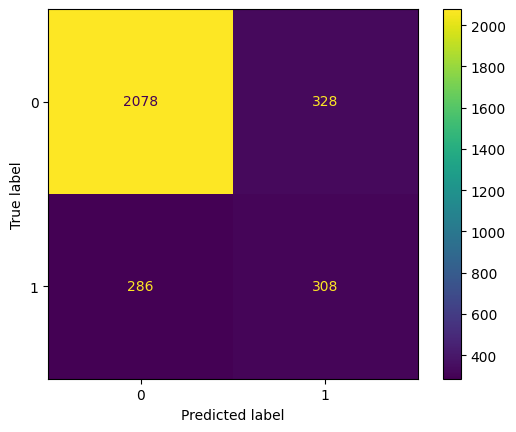

In [45]:
matrix=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(matrix)
cmd.plot()

In [46]:
score=accuracy_score(y_test,y_pred)
score

0.7953333333333333

**MODEL 2 (LOGISTIC REGRESSION)**

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model1=LogisticRegression()

In [49]:
model1.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred1=model1.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

PERFORMANCE EVALUATION

In [51]:
matrix1=confusion_matrix(y_test,y_pred1)
matrix1

array([[2292,  114],
       [ 465,  129]])

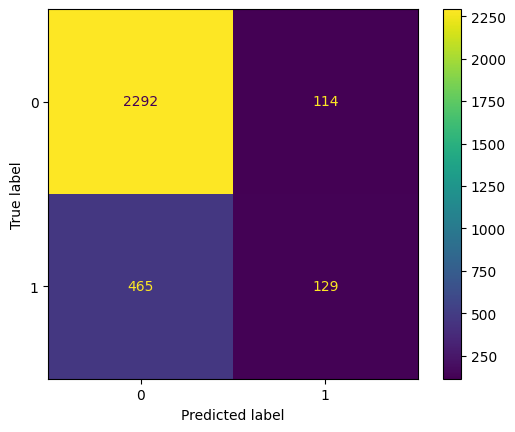

In [52]:
cmd=ConfusionMatrixDisplay(matrix1)
cmd.plot()

In [53]:
score1=accuracy_score(y_test,y_pred1)
score1

0.807

**MODEL 3(svm)**

In [54]:
from sklearn.svm import SVC

In [55]:
model2=SVC()

In [56]:
model2.fit(x_train,y_train)

SVC()

In [57]:
y_pred2=model.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
score2=accuracy_score(y_test,y_pred2)
score2

0.7953333333333333

In [59]:
matrix2=confusion_matrix(y_test,y_pred2)
matrix2

array([[2078,  328],
       [ 286,  308]])

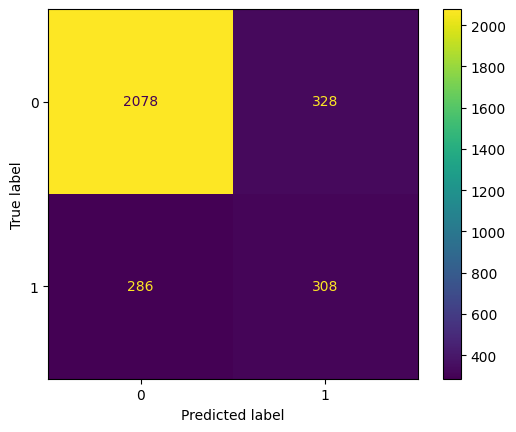

In [60]:
cmd=ConfusionMatrixDisplay(matrix2)
cmd.plot()

**MODEL 4 (RANDOM FOREST)**

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model3=RandomForestClassifier(n_estimators=100)

In [63]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
y_pred3=model3.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

PERFORMANCE EVALUATION

In [65]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix

In [66]:
matrix3=confusion_matrix(y_test,y_pred3)

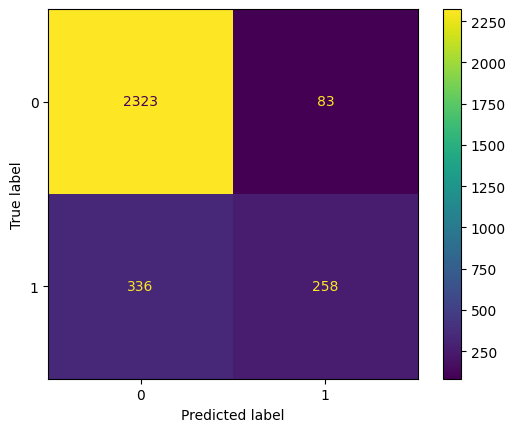

In [67]:
cmd=ConfusionMatrixDisplay(matrix3)
cmd.plot()

In [68]:
score3=accuracy_score(y_test,y_pred3)
score3

0.8603333333333333